# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

#### Импортируем библиотеку pandas, прочитаем файл и сохраним его в перменной data. Изучим данные: выведем первые 10 строк таблицы. 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('/datasets/real_estate_data.csv', delimiter='\t')

#### Изучим данные: выведем первые 10 строк. 

In [3]:
pd.set_option('display.max_columns', None)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Выведем 10 рандомных строк.

In [4]:
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
5576,0,6680000.0,47.0,2017-12-11T00:00:00,1,2.80,25.0,29.0,3,NaN,False,False,10.0,1.0,Санкт-Петербург,36421.0,9176.0,1.0,805.0,0.0,NaN,199.0
15081,20,9500000.0,79.0,2019-03-21T00:00:00,3,2.65,16.0,50.0,8,NaN,False,False,16.0,1.0,Санкт-Петербург,29724.0,11493.0,2.0,464.0,1.0,577.0,NaN
17862,13,7800000.0,57.0,2017-07-27T00:00:00,2,2.50,4.0,28.3,2,NaN,False,False,8.9,4.0,Санкт-Петербург,40329.0,12032.0,2.0,363.0,0.0,NaN,197.0
19231,15,6550000.0,78.0,2017-01-30T00:00:00,3,2.60,16.0,47.0,2,NaN,False,False,14.0,NaN,Санкт-Петербург,16403.0,11646.0,0.0,NaN,1.0,1219.0,660.0
53,7,4300000.0,39.1,2017-11-10T00:00:00,1,NaN,25.0,15.4,13,NaN,False,False,15.5,2.0,посёлок Парголово,52611.0,18783.0,0.0,NaN,0.0,NaN,6.0
14921,5,9000000.0,141.3,2017-06-09T00:00:00,5,NaN,6.0,94.1,5,NaN,False,False,22.4,0.0,Санкт-Петербург,20835.0,3576.0,1.0,653.0,1.0,374.0,4.0
11645,14,5100000.0,42.2,2015-09-07T00:00:00,1,NaN,23.0,18.3,21,False,False,False,11.2,0.0,Санкт-Петербург,37625.0,14153.0,0.0,NaN,0.0,NaN,300.0
729,12,2800000.0,44.0,2019-01-24T00:00:00,2,2.60,4.0,29.0,4,NaN,False,False,5.0,1.0,Гатчина,NaN,NaN,NaN,NaN,NaN,NaN,64.0
8774,15,4380000.0,39.4,2017-12-20T00:00:00,1,2.60,10.0,16.9,6,NaN,False,False,10.2,2.0,Санкт-Петербург,20504.0,22216.0,0.0,NaN,0.0,NaN,45.0
19526,15,3400000.0,42.6,2018-11-25T00:00:00,1,2.60,10.0,17.6,4,NaN,False,False,8.6,NaN,Колпино,28052.0,33839.0,0.0,NaN,0.0,NaN,12.0


После изучения первых и рандомных 10 строк из таблицы видно, что много пропусков в столбце is_apartment, balcony, ceiling_height, parks_nearest, ponds_nearest.

Выведем основную информацию о датафрейме.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

Итак, в таблице 22 столбца с разными типами данных. Количество значений в столбцах различается. Значит, в данных есть пропущенные значения.

#### Построим общую гистограмму для всех числовых столбцов таблицы

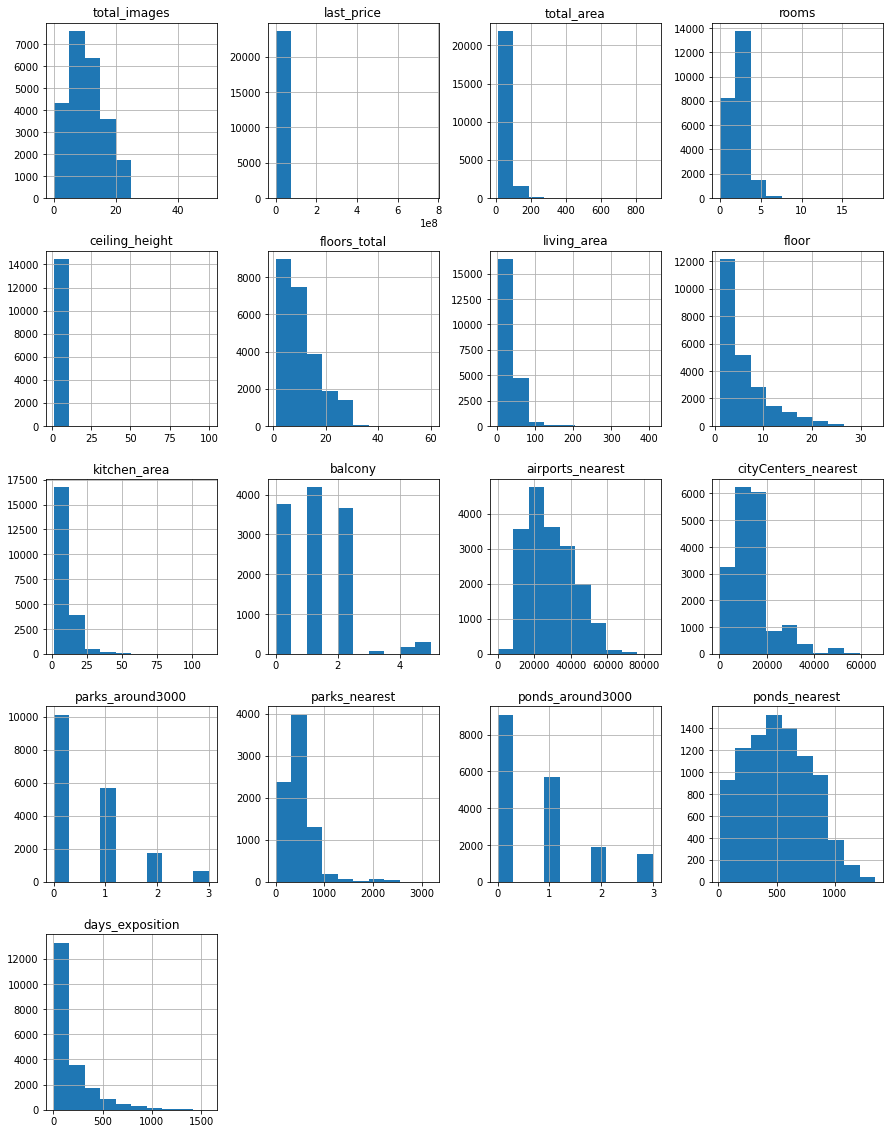

In [6]:
data.hist(figsize=(15, 20));

### Предобработка данных

####  Найдем и изучим пропущенные значения в столбцах

##### Определим, в каких столбцах есть пропуски

Выведем отсортированное по убыванию количество пропущенных значений для каждого столбца. 

In [7]:
data.isna().sum().sort_values(ascending=False)

is_apartment            20924
parks_nearest           15620
ponds_nearest           14589
balcony                 11519
ceiling_height           9195
airports_nearest         5542
cityCenters_nearest      5519
ponds_around3000         5518
parks_around3000         5518
days_exposition          3181
kitchen_area             2278
living_area              1903
floors_total               86
locality_name              49
total_images                0
last_price                  0
studio                      0
floor                       0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

In [8]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Во многих столбцах есть пропуски. В следующих стобцах заменить пропуск на 0 нет возможности. В некоторых столбцах продовец скорее всего не знает эту информацию:<br>
<b>ceiling_height(высота потолков)</b> - высота потолка не может быть равна нулю. <br>
<b>floors_total(всего этажей в доме)</b> - этажей не может быть 0. <br>
<b>living_area(жилая площадь в кв.м.)</b> - площадь не может быть 0.  <br>
<b>days_exposition(сколько дней было размещено объявление (от публикации до снятия))</b><br>
<b>airports_nearest(растояние до близжайшего аэропорта)</b> - растояние не может быть нулевым. <br>
<b>parks_nearest(растояние до парка)</b>- расстояние не может быть 0, т.к. квартира навряд ли находится в парке.<br>
<b>kitchen_area(площадь кухни)</b> - можно заменить на 0, т.к. квартира может быть студией, в которой кухня не выделена в отдельное помещение. <br>
<b>cityCenters_nearest(растояние до центра города)</b> - теоритически квартира может находится в центре, но скорее можно предположить, что продавец не знает эту информацию. Заменить на 0 нельзя. <br>

Что касается остальных столбцов: <br>
<b>balcony(число балконов)</b> - можно заменить на 0, т.к. отсутствие информации скорее всего говорит о том, что балкон в квартире отсутствует. <br>
<b>parks_around3000(число парков в радиусе 3км) и ponds_around3000(число водоёмов в радиусе 3 км)</b> - пропуск скорее всего говорит о том, что парков в радиусе 3 км нет. <br>

Кроме того, обратим внимание, что чаще всего пропуски встречаются именно в столбцах с картографическими данными, а не заполненными пользователями(parks_nearest, ponds_nearest, airports_nearest, cityCenters_nearest). Возможно есть какая-то проблема с вычислением и добавлением этих данных. Думаю, следовало бы обратиться с этой информацией в отдел разработки. 


Проверим наличие явных дубликатов:

Явных дубликатов нет. 

##### Заполним пропущенные значения

Посмотрим сколько пропущенных значений в каждом столбце в процентом соотношении: 

In [9]:
data.isna().sum().sort_values(ascending=False)/data.shape[0]*100

is_apartment            88.290645
parks_nearest           65.909954
ponds_nearest           61.559559
balcony                 48.605426
ceiling_height          38.799105
airports_nearest        23.384953
cityCenters_nearest     23.287902
ponds_around3000        23.283683
parks_around3000        23.283683
days_exposition         13.422507
kitchen_area             9.612220
living_area              8.029875
floors_total             0.362885
locality_name            0.206760
total_images             0.000000
last_price               0.000000
studio                   0.000000
floor                    0.000000
rooms                    0.000000
first_day_exposition     0.000000
total_area               0.000000
open_plan                0.000000
dtype: float64

<b>Вывод</b>: в столбце locality_name процент пропусков всего 0,2%. Удалим эти строки, т.к. у данных объектов нет информации по местоположению и они будут мешать в анализе. Также поступим с пропущенными данным в столбце floors_total. 

In [10]:
data = data.dropna(subset=['locality_name', 'floors_total']) #удалим пропуски 
data.isna().sum().sort_values(ascending=False) #проверим себя 

is_apartment            20805
parks_nearest           15535
ponds_nearest           14529
balcony                 11475
ceiling_height           9084
airports_nearest         5524
cityCenters_nearest      5501
ponds_around3000         5500
parks_around3000         5500
days_exposition          3171
kitchen_area             2222
living_area              1865
locality_name               0
total_images                0
last_price                  0
studio                      0
floor                       0
floors_total                0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Произведем замену пропусков нужно в столбцах balcony, parks_around3000, ponds_around3000. 

In [11]:
data['balcony'] = data['balcony'].fillna(0) 
data['parks_around3000'] = data['parks_around3000'].fillna('0')
data['ponds_around3000'] = data['ponds_around3000'].fillna('0')
data.isna().sum().sort_values(ascending=False)#проверим себя

is_apartment            20805
parks_nearest           15535
ponds_nearest           14529
ceiling_height           9084
airports_nearest         5524
cityCenters_nearest      5501
days_exposition          3171
kitchen_area             2222
living_area              1865
balcony                     0
ponds_around3000            0
parks_around3000            0
locality_name               0
total_images                0
last_price                  0
studio                      0
floor                       0
floors_total                0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Теперь в столбцах balcony(float64), parks_around3000(float64) нет пропусков. 

Больше всего пропусков содержится в столбце is_apartment. Вероятнее всего пропуск в данном столбце означает, что объект не относится к апартоментам. 

In [12]:
data['is_apartment'] = data['is_apartment'].fillna(value=False)#заменим пропуск на False
data.isna().sum().sort_values(ascending=False)#проверим себя

parks_nearest           15535
ponds_nearest           14529
ceiling_height           9084
airports_nearest         5524
cityCenters_nearest      5501
days_exposition          3171
kitchen_area             2222
living_area              1865
ponds_around3000            0
parks_around3000            0
locality_name               0
balcony                     0
total_images                0
last_price                  0
studio                      0
is_apartment                0
floor                       0
floors_total                0
rooms                       0
first_day_exposition        0
total_area                  0
open_plan                   0
dtype: int64

Также много пропусков в столбце ceiling_height. Заменим на медианное значение по всему датасету. Для этого сначала распечатаем медиану и посмотрим корректное ли это значение. 

In [13]:
print(data['ceiling_height'].median())

2.65


Значение отражает реальность, поэтому произведем замену. 

In [14]:
data['ceiling_height'] = data['ceiling_height'].fillna(data['ceiling_height'].median())
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

In [15]:
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,False,False,False,25.00,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.65,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,False,False,False,41.00,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской посёлок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.65,26.0,10.60,6,False,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.65,24.0,NaN,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,посёлок Мурино,NaN,NaN,0,NaN,0,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


##### Причины, которые могли привести к пропускам в данных.

<b>Вывод:</b><br>
 Пропуски данных по большей части обусловлены неполноценным заполнением всех полей в форме объявления. Если данная информация принципиальна, то, возможно, стоит сделать эти поля обязательными для заполнения. 

#### Рассмотрим типы данных в каждом столбце.

##### Найдем столбцы, в которых нужно изменить тип данных

Повторно вызовем всю информацию по таблице. 

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23565 non-null  int64  
 1   last_price            23565 non-null  float64
 2   total_area            23565 non-null  float64
 3   first_day_exposition  23565 non-null  object 
 4   rooms                 23565 non-null  int64  
 5   ceiling_height        23565 non-null  float64
 6   floors_total          23565 non-null  float64
 7   living_area           21700 non-null  float64
 8   floor                 23565 non-null  int64  
 9   is_apartment          23565 non-null  bool   
 10  studio                23565 non-null  bool   
 11  open_plan             23565 non-null  bool   
 12  kitchen_area          21343 non-null  float64
 13  balcony               23565 non-null  float64
 14  locality_name         23565 non-null  object 
 15  airports_nearest   

<b>Вывод:</b> видим, что типы данных некорректные: <br>
first_day_exposition - дата публикации имеет тип данных object, а должен datetime.<br>
is_apartment - должен быть bool, сейчас object.<br>
balcony - должен быть int, сейчас object.<br>
parks_around3000 -должен быть int, сейчас object.<br>

##### Преобразуем тип данных в выбранных столбцах.

In [17]:
data.astype({ 'balcony': 'int', 'parks_around3000': 'int', 'floors_total': 'int'})
data['is_apartment'] = data['is_apartment'].astype('bool')#изменин на булевый тип
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y.%m.%d %H:%M:%S')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23565 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23565 non-null  int64         
 1   last_price            23565 non-null  float64       
 2   total_area            23565 non-null  float64       
 3   first_day_exposition  23565 non-null  datetime64[ns]
 4   rooms                 23565 non-null  int64         
 5   ceiling_height        23565 non-null  float64       
 6   floors_total          23565 non-null  float64       
 7   living_area           21700 non-null  float64       
 8   floor                 23565 non-null  int64         
 9   is_apartment          23565 non-null  bool          
 10  studio                23565 non-null  bool          
 11  open_plan             23565 non-null  bool          
 12  kitchen_area          21343 non-null  float64       
 13  balcony         

##### Почему нужно изменить тип данных.

<b>Вывод:</b> Для того, чтобы провести качественный анализ, нужно проводить различные манипуляции с данными. Без изменения типа данных можно в определенный момент столкнуться с ошибками.

#### Изучим уникальные значения в столбце с названиями и устраните неявные дубликаты.

Выведем перечень уникальных значений столбца locality_name, отсротированный по алфавиту. 

In [18]:
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалёво',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Янино-1',
       'городской посёлок Будогощь', 'городской посёлок Виллози',
       'городской посёлок Лесогорский', 'городской посёлок Мга',
       'городской посёлок Назия', 'городской посёлок Новоселье',
       'городской посёлок Павлово', 'городской посёлок Рощино',
       'городской посёлок Свирьстрой', 'городской посёлок Совет

Посчитаем сколько уникальных значений сейчас: 

In [19]:
len(data['locality_name'].sort_values().unique())

364

In [20]:
#Чаще всего встречается неявные дубликаты с буквами е и ё. Избавимся от этого. 
data['locality_name'] = data['locality_name'].str.replace('ё', 'е', regex=True)
data['locality_name'].sort_values().unique()

array(['Бокситогорск', 'Волосово', 'Волхов', 'Всеволожск', 'Выборг',
       'Высоцк', 'Гатчина', 'Зеленогорск', 'Ивангород', 'Каменногорск',
       'Кингисепп', 'Кириши', 'Кировск', 'Колпино', 'Коммунар',
       'Красное Село', 'Кронштадт', 'Кудрово', 'Лодейное Поле',
       'Ломоносов', 'Луга', 'Любань', 'Мурино', 'Никольское',
       'Новая Ладога', 'Отрадное', 'Павловск', 'Петергоф', 'Пикалево',
       'Подпорожье', 'Приморск', 'Приозерск', 'Пушкин', 'Санкт-Петербург',
       'Светогорск', 'Сертолово', 'Сестрорецк', 'Сланцы', 'Сосновый Бор',
       'Сясьстрой', 'Тихвин', 'Тосно', 'Шлиссельбург',
       'городской поселок Большая Ижора', 'городской поселок Будогощь',
       'городской поселок Виллози', 'городской поселок Лесогорский',
       'городской поселок Мга', 'городской поселок Назия',
       'городской поселок Новоселье', 'городской поселок Павлово',
       'городской поселок Рощино', 'городской поселок Свирьстрой',
       'городской поселок Советский', 'городской поселок Фед

In [21]:
# Столько уникальных значений сейчас
len(data['locality_name'].sort_values().unique())

330

Итог: избавились от 34 неявных дубликатов. 

In [22]:
#Встречается поселок Рябово и поселок городского типа Рябово. Скорее всего это один и тот же населенный пункт. Избавимся от него. 
data = data.loc[data['locality_name'] != 'поселок Рябово']
len(data['locality_name'].sort_values().unique())

329

Избавились от еще одного неявного дубликата. 
Могут встречаться и другие повторы в названиях, но так как нет достоверной информации о том, что это действительно один и тот же населеный пункт, то не будем вносить изменения. 

#### Найдем и устраним редкие и выбивающиеся значения.

Изучим столбцы data  данными, вводимыми пользователями, напредмет редких и выбивающихся значений. 

##### Столбец total_images

In [23]:
data['total_images'].unique()

array([20,  7, 10,  0,  2,  6,  5, 18,  9,  1, 16, 11,  8, 12, 13,  3, 15,
       17, 14, 19, 32,  4, 35, 39, 23, 21, 27, 30, 24, 25, 28, 31, 22, 29,
       26, 50, 42, 37])

<b>Вывод:</b> необычных значений не вижу. В тех. задании нет упоминания о том, какое количество изображений может быть добавленно максимально, поэтому количество 50 не принимаю за выбивающееся.

##### Столбец last_price

In [24]:
print(data['last_price'].unique())
print('минимальная цена: ', data['last_price'].min())
print('максимальная цена: ', data['last_price'].max())

[13000000.  3350000.  5196000. ...  6151120. 21400000. 11475000.]
минимальная цена:  12190.0
максимальная цена:  763000000.0


Видим, что минимальная цена в квартиру выставлена 12190, что не представляется реальным. Удалим строки с данным значением. 

In [25]:
data = data.loc[data['last_price'] != 12190]
print('минимальная цена: ', data['last_price'].min())

минимальная цена:  430000.0


Теперь минимальная цена составляет 430 000 рублей. Что больше похоже на реальность - в небольшом населенном пункте недвижимость вполне может столько стоить. 
Максимальная же цена 763 000 000 рублей, что много, но тоже реально.

##### Столбец total_area

In [26]:
print(data['total_area'].unique())
print('минимальная общая площадь: ', data['total_area'].min())
print('максимальная общая площадь: ', data['total_area'].max())

[108.    40.4   56.   ...  66.86 133.81  76.75]
минимальная общая площадь:  12.0
максимальная общая площадь:  900.0


<b>Вывод:</b> если говорить о студии, то площадь в 12 кв.м. представляется реальной. Также и квартира может быть 900 кв.м. Значения не считаю выбивающимися. 

##### Столбец rooms

In [27]:
print(data['rooms'].unique())
print('минимальное кол. комнат: ', data['rooms'].min())
print('максимальное кол. комнат: ', data['rooms'].max())

[ 3  1  2  4  5  6  0  7 11  8 14 10 15  9 19 16 12]
минимальное кол. комнат:  0
максимальное кол. комнат:  19


In [28]:
#нулевое количество комнат быть не может. Избавимся от некоректных значений
data = data.loc[data['rooms'] != 0]
print('минимальное кол. комнат: ', data['rooms'].min())

минимальное кол. комнат:  1


<b>Вывод:</b> избавились от некорректного значения 0 комнат. Минимальное стало 1. Максимальное 19 комант, что тоже может быть возможным. 

##### Столбец ceiling_height

In [29]:
print(data['ceiling_height'].unique())
len(data['ceiling_height'].unique())

[  2.7    2.65   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     3.2    2.61   3.25   3.45   2.77   2.85   2.64
   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84   3.1
   2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.     2.58
   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6    2.92
   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53   2.74
   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82   3.54
   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9    3.18
   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83   3.52
   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19   3.24
   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37   3.09
   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68   3.22
   3.27   4.1    2.93   3.46  24.     3.47   3.33  27.     3.63   3.32
  26.     1.2    8.3    2.98   2.86   3.17   4.4    3.28   3.04   4.45
   5.5  

182

Видно, что имеют место некорректные значения, например 27,5 м. Высота потолков навряд ли может составлять 27,5 м. Логично предположить, что пользователь имел ввиду 2,75 м. 

In [30]:
#data = data.replace({'ceiling_height' : { 25 : 2.5, 32 : 3.2, 27 : 2.7, 24 : 2.4, 26 : 2.6, 22.6 : 2.6, 27.5 : 2.75}})
#print(data['ceiling_height'].unique())
#len(data['ceiling_height'].unique())

Природа таких значений как 14.85, 15, 1.2, 14, 20, 1, 100 не совсем ясна. Поэтому удалим эти данные. 

In [31]:
#data = data.loc[data['ceiling_height'] != 14.85]
#data = data.loc[data['ceiling_height'] != 15]
#data = data.loc[data['ceiling_height'] != 1.2]
#data = data.loc[data['ceiling_height'] != 14]
#data = data.loc[data['ceiling_height'] != 20]
#data = data.loc[data['ceiling_height'] != 1]
#data = data.loc[data['ceiling_height'] != 100]
#data = data.loc[data['ceiling_height'] != 10.3]
#print(data['ceiling_height'].unique())
#len(data['ceiling_height'].unique())

##### Столбец rooms floors_total

In [32]:
data['floors_total'].unique()

array([16., 11.,  5., 14., 12., 26., 24., 27.,  9.,  6., 17., 25.,  3.,
       23., 19., 18.,  4., 22.,  8.,  2., 10.,  7., 13., 15., 20., 28.,
       36., 21., 35., 34., 60.,  1., 29., 33., 52., 37.])

<b>Вывод:</b>теоритически все значения являются реальными. Изменения не вносим.

##### Столбец floor

In [33]:
print(data['floor'].unique())
print('минимальный этаж: ', data['floor'].min())
print('максимальный этаж: ', data['floor'].max())

[ 8  1  4  9 13  5  6 22 26  7  3  2 11 15 18 10 19 16 20 27 25 17 14 12
 21 28 24 23 30 29 32 33 31]
минимальный этаж:  1
максимальный этаж:  33


<b>Вывод:</b>Числа отвечают реальности. 

##### Столбец kitchen_area

In [34]:
print(data['kitchen_area'].unique())
print('минимальная площадь кухни: ', data['kitchen_area'].min())
print('максимальная площадь кухни: ', data['kitchen_area'].max())

[ 25.    11.     8.3     nan  41.     9.1   14.4   18.9    8.81   6.5
   8.5    6.     9.     5.2    8.     7.6    5.6   12.     5.7    6.1
  19.6   15.     7.     9.2   11.7   13.4   17.     6.3   11.6    8.8
  10.    17.6    7.5    9.5   50.    15.5   10.7   11.1   20.    11.9
  16.     5.3   11.5    7.2    6.2   10.4    7.1    4.9    7.3   11.95
  10.2    6.4    5.5   13.     8.4   23.6   10.8   18.3    5.     8.2
  24.    23.8    6.6   26.85  15.4    7.8   33.8    5.4   12.72  12.2
  19.    12.4    7.9   10.3    9.8   17.5   14.7   20.91  21.3   10.6
  10.9    9.7    7.7   12.5   11.4    8.6   11.24  14.1   15.7   13.29
  14.    12.9   12.7   16.5    9.36  21.5   35.    10.5    8.7   19.3
  21.4   40.    49.2   11.52   8.9    9.6   30.    14.2    8.1   10.44
   4.5   16.3   11.2   18.4    7.4   11.3    9.4   13.1   10.19   7.06
  22.    36.     5.1   18.7    9.9   14.3   18.    23.    19.4   11.8
  13.3   17.7   23.1   21.1   11.33  13.5   19.5   13.2   17.2   77.
  13.8   12.3    

<b>Вывод:</b> хоть минимальное значение и вызывает вопросы, однако в небольших квартирах-студиях площадь кухни может быть 1,3 кв.м. Поэтому не вносим измнения в данные. 

##### Столбец balcony

In [35]:
print(data['balcony'].unique())
print('минимальное кол. балконов: ', data['balcony'].min())
print('максимальное кол. балконов: ', data['balcony'].max())

[0. 2. 1. 5. 4. 3.]
минимальное кол. балконов:  0.0
максимальное кол. балконов:  5.0


<b>Вывод:</b> Значения отвечают реальности: в квартире может не быть балкона, а может быть их и 5. 

##### Столбец days_exposition

In [36]:
print(data['days_exposition'].unique())
print('минимальное кол. дней размещения: ', data['days_exposition'].min())
print('максимальное кол. дней размещения: ', data['days_exposition'].max())

[  nan   81.  558. ... 1360. 1007.  971.]
минимальное кол. дней размещения:  1.0
максимальное кол. дней размещения:  1580.0


##### Обработаем редкие и выбивающиеся значения 

In [37]:
# Функция для подсчёта границ с учетом 1.5 размаха
def quartile_range(df, column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    dfq = df.loc[(df[column] < q3 + 1.5*iqr) & (df[column] > q1 - 1.5*iqr), column]
    return dfq
# Столбцы с выбросами
list_features = ['total_area', 'kitchen_area', 'living_area', 'days_exposition', 'ceiling_height', 'rooms']
for col in list_features:
    data[col] = quartile_range(data, col)

# Возвращаем в целочисленный тип число комнат
data['rooms'] = data['rooms'].fillna(0).astype(int)

# Изучаем, есть ли выбивающиеся значения
data.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_nearest,ponds_nearest,days_exposition
count,23368.000000,2.336800e+04,22137.000000,23368.000000,20417.000000,23368.000000,20744.000000,23368.000000,20147.000000,23368.000000,17923.000000,17946.000000,8001.000000,8968.000000,18562.000000
mean,9.895498,6.567268e+06,54.568011,2.030127,2.630727,10.624101,31.655350,5.855486,9.499128,0.590166,28824.501702,14198.078959,490.206224,518.244759,129.034264
std,5.683048,1.094301e+07,19.259651,0.973584,0.081581,6.567087,13.931751,4.850453,3.123933,0.960200,12629.586930,8631.769137,341.667939,278.036420,121.640084
min,0.000000,4.300000e+05,12.000000,0.000000,2.460000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,1.000000,13.000000,1.000000
25%,6.000000,3.450000e+06,40.000000,1.000000,2.600000,5.000000,18.500000,2.000000,7.000000,0.000000,18583.500000,9238.000000,288.000000,293.000000,42.000000
50%,9.000000,4.650000e+06,50.410000,2.000000,2.650000,9.000000,30.000000,4.000000,9.000000,0.000000,26770.000000,13092.000000,454.000000,503.000000,85.000000
75%,14.000000,6.800000e+06,65.700000,3.000000,2.650000,16.000000,41.000000,8.000000,11.100000,1.000000,37291.000000,16285.000000,612.000000,730.000000,183.000000
max,50.000000,7.630000e+08,114.600000,5.000000,2.850000,60.000000,77.800000,33.000000,19.450000,5.000000,84869.000000,65968.000000,3190.000000,1344.000000,512.000000


<b>Вывод:</b> минимальное значение не вызывает вопросов, а вот максимальное... Однако, вполне возможно, что дорогостоящий объект может продаваться достаточно продолжительное время. Так, не имеяя информации опровергающей это, вносить измнения в данные н будем. 

### Посчитайте и добавьте в таблицу новые столбцы

#### Добавим столбец с ценой одного квадратного метра

In [38]:
data['price_per_meter'] = data['last_price'] / data['total_area']
data['price_per_meter'] = data['price_per_meter'].round(decimals=2)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,NaN,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,NaN,92785.71
3,0,64900000.0,NaN,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN
4,2,10000000.0,100.00,2018-06-19,2,NaN,14.0,32.00,13,False,False,False,NaN,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской поселок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.79
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,False,False,14.40,1.0,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.71
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.69
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,189.0,87454.76
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.59


#### Добавим столбец с денем недели публикации объявления

In [39]:
data['day_of_week_exposition'] = data['first_day_exposition'].dt.day_name()
data['day_of_week_exposition_number'] = data['first_day_exposition'].dt.weekday
data['month_exposition'] = data['first_day_exposition'].dt.month_name()
data['year_exposition'] = data['first_day_exposition'].dt.year
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_of_week_exposition,day_of_week_exposition_number,month_exposition,year_exposition
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,NaN,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,Thursday,3,March,2019
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,Tuesday,1,December,2018
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,NaN,92785.71,Thursday,3,August,2015
3,0,64900000.0,NaN,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,Friday,4,July,2015
4,2,10000000.0,100.00,2018-06-19,2,NaN,14.0,32.00,13,False,False,False,NaN,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,Tuesday,1,June,2018
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской поселок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.79,Monday,0,September,2018
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,False,False,14.40,1.0,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.71,Thursday,3,November,2017
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.69,Thursday,3,April,2019
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,189.0,87454.76,Wednesday,2,May,2018
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.59,Sunday,6,February,2017


#### Добавим столбец с типом этажа квартиры

In [40]:
def floor_status(row):
    if row['floor'] == 1:
        return 'первый'
    elif row['floor'] == row['floors_total']:
        return 'последний'
    else:
        return 'другой'

data['floor_status'] = data.apply(floor_status, axis=1)
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_of_week_exposition,day_of_week_exposition_number,month_exposition,year_exposition,floor_status
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,NaN,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,Thursday,3,March,2019,другой
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,Tuesday,1,December,2018,первый
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,NaN,92785.71,Thursday,3,August,2015,другой
3,0,64900000.0,NaN,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,Friday,4,July,2015,другой
4,2,10000000.0,100.00,2018-06-19,2,NaN,14.0,32.00,13,False,False,False,NaN,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,Tuesday,1,June,2018,другой
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской поселок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.79,Monday,0,September,2018,другой
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,False,False,14.40,1.0,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.71,Thursday,3,November,2017,другой
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.69,Thursday,3,April,2019,другой
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,189.0,87454.76,Wednesday,2,May,2018,другой
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.59,Sunday,6,February,2017,другой


In [41]:
#Провери себя: последний этаж дейстивтельно послений! 
data.sample(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_of_week_exposition,day_of_week_exposition_number,month_exposition,year_exposition,floor_status
11997,20,4150000.0,40.4,2017-05-01,1,2.65,5.0,17.04,5,False,False,False,NaN,0.0,Пушкин,20562.0,30937.0,0.0,NaN,1.0,349.0,35.0,102722.77,Monday,0,May,2017,последний
1171,15,7800000.0,62.6,2017-04-21,2,2.65,17.0,39.50,15,False,False,False,10.0,0.0,Санкт-Петербург,34519.0,12100.0,0.0,NaN,0.0,NaN,20.0,124600.64,Friday,4,April,2017,другой
3724,13,3150000.0,32.8,2017-05-17,1,2.65,15.0,18.00,11,False,False,False,NaN,0.0,Санкт-Петербург,33972.0,11746.0,1.0,520.0,1.0,949.0,61.0,96036.59,Wednesday,2,May,2017,другой
14005,4,2000000.0,48.5,2017-05-26,2,2.50,5.0,29.60,1,False,False,False,7.0,0.0,село Путилово,NaN,NaN,0,NaN,0,NaN,75.0,41237.11,Friday,4,May,2017,первый
8154,9,2500000.0,65.4,2019-02-23,3,2.65,9.0,33.00,1,False,False,False,10.0,0.0,Всеволожск,NaN,NaN,0,NaN,0,NaN,NaN,38226.30,Saturday,5,February,2019,первый
2870,10,2150000.0,54.0,2019-03-05,2,2.50,5.0,29.00,2,False,False,False,8.5,2.0,поселок Молодцово,NaN,NaN,0,NaN,0,NaN,45.0,39814.81,Tuesday,1,March,2019,другой
19788,0,7900000.0,69.0,2016-06-16,2,2.70,12.0,37.00,8,False,False,False,11.0,2.0,Санкт-Петербург,34939.0,10841.0,0.0,NaN,3.0,616.0,7.0,114492.75,Thursday,3,June,2016,другой
15691,4,1800000.0,53.5,2017-11-24,2,2.50,5.0,29.70,1,False,False,False,8.1,0.0,Волосово,NaN,NaN,0,NaN,0,NaN,90.0,33644.86,Friday,4,November,2017,первый
20602,9,5200000.0,59.7,2017-04-30,3,2.60,9.0,35.00,6,False,False,False,7.0,2.0,Санкт-Петербург,12407.0,14998.0,0.0,NaN,1.0,1016.0,296.0,87102.18,Sunday,6,April,2017,другой
22711,10,3950000.0,37.9,2019-03-07,1,2.78,17.0,16.40,3,False,False,False,9.1,0.0,Санкт-Петербург,17209.0,16005.0,1.0,557.0,2.0,830.0,37.0,104221.64,Thursday,3,March,2019,другой


#### Добавим в таблицу столбец с расстояниями в километрах

In [42]:
#По заданию нужно перевести расстояние до центра города, но для однородности данных переведем и остальные расстояния в км
data['city_center_distance_km'] = data['cityCenters_nearest'] / 1000
data['nearest_airport_distance_km'] = data['airports_nearest'] / 1000
data['nearest_park_distance_km'] = data['parks_nearest'] / 1000
data['nearest_pond_distance_km'] = data['ponds_nearest'] / 1000
data.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_of_week_exposition,day_of_week_exposition_number,month_exposition,year_exposition,floor_status,city_center_distance_km,nearest_airport_distance_km,nearest_park_distance_km,nearest_pond_distance_km
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,NaN,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,Thursday,3,March,2019,другой,16.028,18.863,0.482,0.755
1,7,3350000.0,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,Tuesday,1,December,2018,первый,18.603,12.817,NaN,NaN
2,10,5196000.0,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,NaN,92785.71,Thursday,3,August,2015,другой,13.933,21.741,0.090,0.574
3,0,64900000.0,NaN,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,Friday,4,July,2015,другой,6.800,28.098,0.084,0.234
4,2,10000000.0,100.00,2018-06-19,2,NaN,14.0,32.00,13,False,False,False,NaN,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,Tuesday,1,June,2018,другой,8.098,31.856,0.112,0.048
5,10,2890000.0,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской поселок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.79,Monday,0,September,2018,другой,NaN,NaN,NaN,NaN
6,6,3700000.0,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,False,False,14.40,1.0,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.71,Thursday,3,November,2017,другой,19.143,52.996,NaN,NaN
7,5,7915000.0,71.60,2019-04-18,2,2.65,24.0,NaN,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.69,Thursday,3,April,2019,другой,11.634,23.982,NaN,NaN
8,20,2900000.0,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,189.0,87454.76,Wednesday,2,May,2018,другой,NaN,NaN,NaN,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.59,Sunday,6,February,2017,другой,15.008,50.898,NaN,NaN


### Проведите исследовательский анализ данных

#### Изучим параметры объектов

##### Общая площадь 

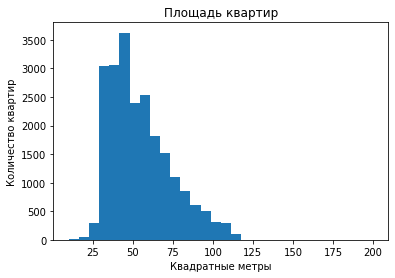

In [43]:
plt.hist(data['total_area'], bins=30, range=(10,200))
plt.title('Площадь квартир')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Основная масса данных лежит в диапазоне до 100 кв.м. Чаще всего встречается 40-50 кв.м.

##### Жилая площадь

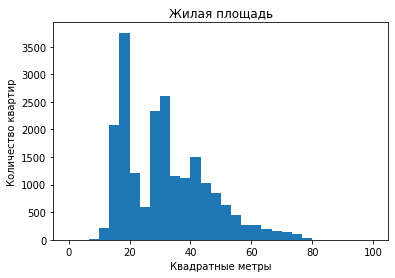

In [44]:
plt.hist(data['living_area'], bins=30, range=(0,100))
plt.title('Жилая площадь')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Основная масса данных лежит в диапазоне от 10 до 80 кв.м. Три пика обсуловлены, вероятно тем, что это данные для однокомнатной, 2-конатной и 3-контаных квартир соответственно. 

##### Площадь кухни

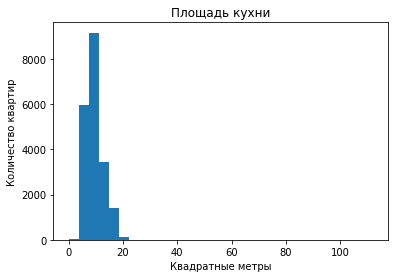

In [45]:
plt.hist(data['kitchen_area'], bins=30, range=(0,112))
plt.title('Площадь кухни')
plt.xlabel('Квадратные метры')
plt.ylabel('Количество квартир')
plt.show()

Основная масса данных лежит в диапазоне от 0 до 20 кв.м. Чаще всего встречаются кухни в районе 10 кв.м.

##### Цена объекта

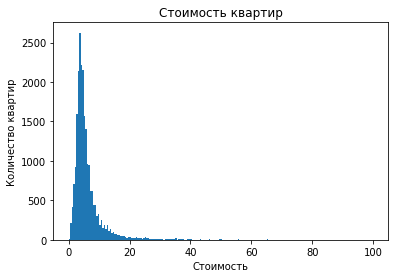

In [46]:
data['last_price'] = data['last_price']/1000000 # Для удобства переведу цену за квартиру в млн.руб 
plt.hist(data['last_price'], bins=200, range=(0,100))
plt.title('Стоимость квартир')
plt.xlabel('Стоимость')
plt.ylabel('Количество квартир')
plt.show()

Основная масса данных лежит в диапазоне от 0 до 20 млн.руб. Чаще всего встречается 5-10 млн.руб. 

##### Количество комнат

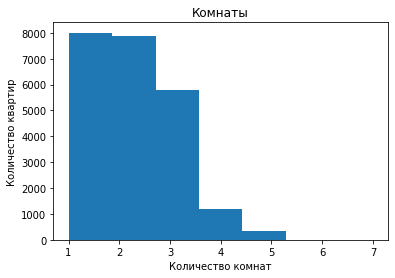

In [47]:
plt.hist(data['rooms'], bins=7, range=(1,7))
plt.title('Комнаты')
plt.xlabel('Количество комнат')
plt.ylabel('Количество квартир')
plt.show()

Чаще всего встречаются однокомнатные и двухкомнатные квартиры. Значительно меньше 4-конатных вариантов, а объекты с 5 комнатами и больше встречаются редко.

##### Высота потолков

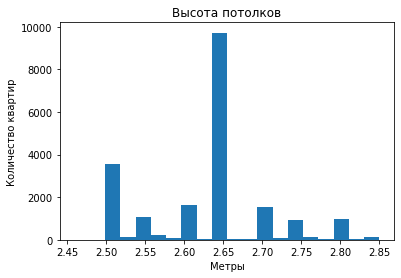

In [48]:
plt.hist(data.query('(ceiling_height > 2) & (ceiling_height < 4)')['ceiling_height'], bins=20)
plt.title('Высота потолков')
plt.xlabel('Метры')
plt.ylabel('Количество квартир')
plt.show()

Высота потолков основной массы объектов укладывается в диапазон от 2,5 до 3 метров. Более 3 метров - редкие случаи. Чаще всего встречается 2,6-2,75 м. 

##### Этаж квартиры

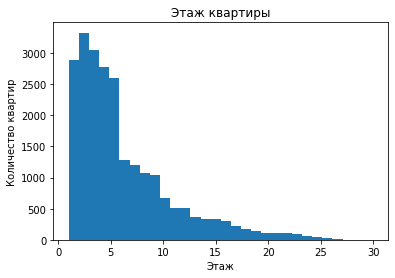

In [49]:
plt.hist(data['floor'], bins=30, range=(1,30))
plt.title('Этаж квартиры')
plt.xlabel('Этаж')
plt.ylabel('Количество квартир')
plt.show()

Основная масса данных лежит в диапазоне от 1 до 20 этажа. Объекты быши 25 этажа встречаются редко. Чаще всего встречается 2 и 3 этажи.

##### Тип этажа квартиры

In [50]:
#Добавим столбец, в котором каждому типу этажа будет присвоено цифровое значение: Первый этаж =1, Послений=2, Другой=0.
def translate_in_number(row):
    floor_status= row['floor_status']
    
    if floor_status == 'другой':
        return 0
    
    if floor_status == 'первый':
        return 1
    
    if floor_status == 'последний':
        return 2

data['floor_status_number'] = data.apply(translate_in_number, axis = 1)
data.head(10)#Проверим себя

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_of_week_exposition,day_of_week_exposition_number,month_exposition,year_exposition,floor_status,city_center_distance_km,nearest_airport_distance_km,nearest_park_distance_km,nearest_pond_distance_km,floor_status_number
0,20,13.000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,NaN,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,Thursday,3,March,2019,другой,16.028,18.863,0.482,0.755,0
1,7,3.350,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,Tuesday,1,December,2018,первый,18.603,12.817,NaN,NaN,1
2,10,5.196,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,NaN,92785.71,Thursday,3,August,2015,другой,13.933,21.741,0.090,0.574,0
3,0,64.900,NaN,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,Friday,4,July,2015,другой,6.800,28.098,0.084,0.234,0
4,2,10.000,100.00,2018-06-19,2,NaN,14.0,32.00,13,False,False,False,NaN,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,Tuesday,1,June,2018,другой,8.098,31.856,0.112,0.048,0
5,10,2.890,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской поселок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.79,Monday,0,September,2018,другой,NaN,NaN,NaN,NaN,0
6,6,3.700,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,False,False,14.40,1.0,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.71,Thursday,3,November,2017,другой,19.143,52.996,NaN,NaN,0
7,5,7.915,71.60,2019-04-18,2,2.65,24.0,NaN,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.69,Thursday,3,April,2019,другой,11.634,23.982,NaN,NaN,0
8,20,2.900,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,189.0,87454.76,Wednesday,2,May,2018,другой,NaN,NaN,NaN,NaN,0
9,18,5.400,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.59,Sunday,6,February,2017,другой,15.008,50.898,NaN,NaN,0


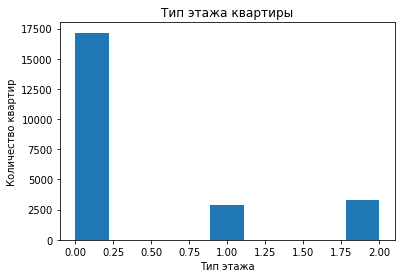

In [51]:
plt.hist(data['floor_status_number'], bins=9, range=(0,2))
plt.title('Тип этажа квартиры')
plt.xlabel('Тип этажа')
plt.ylabel('Количество квартир')
plt.show()

Больше всего объектов расположены не на первом и не на последнем этажах. Если сравнивать первый и последний, то объектов, расположенных на последнем этаже больше. 

##### Общее количество этажей в доме

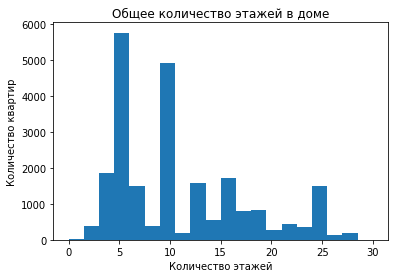

In [52]:
plt.hist(data['floors_total'], bins=20, range=(0,30))
plt.title('Общее количество этажей в доме')
plt.xlabel('Количество этажей')
plt.ylabel('Количество квартир')
plt.show()

Выделяется два пика в 5 жтажей и в 8-10 этажей. Домов с этажностью больше 25 значительно меньше. 

##### Расстояние до центра города в метрах

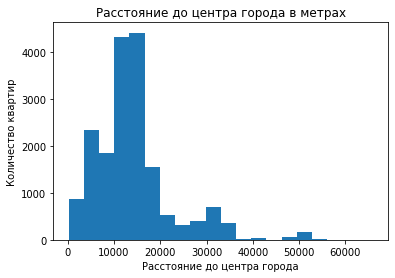

In [53]:
plt.hist(data['cityCenters_nearest'], bins=20)
plt.title('Расстояние до центра города в метрах')
plt.xlabel('Расстояние до центра города')
plt.ylabel('Количество квартир')
plt.show()

Основная масса данных лежит в диапазоне от 0 до 36000 м. Чаще всего объекты распологаются на расстоянии от 10000-17000 м. 

##### Расстояние до ближайшего аэропорта

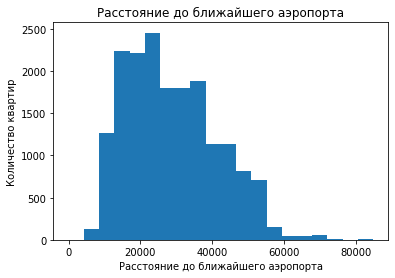

In [54]:
plt.hist(data['airports_nearest'], bins=20)
plt.title('Расстояние до ближайшего аэропорта')
plt.xlabel('Расстояние до ближайшего аэропорта')
plt.ylabel('Количество квартир')
plt.show()

Основная масса данных лежит в диапазоне от 6000 до 55000 м. Чаще всего объекты распологаются на расстоянии, примерно, 19000-20000 м. Объекты на расстоянии от аэропорта больше 60000 м редкие. 

##### Расстояние до ближайшего парка

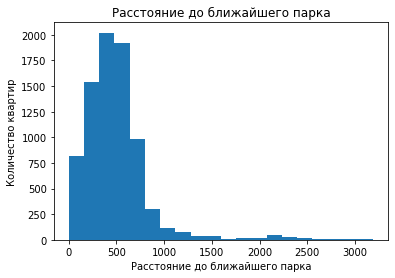

In [55]:
plt.hist(data['parks_nearest'], bins=20)
plt.title('Расстояние до ближайшего парка')
plt.xlabel('Расстояние до ближайшего парка')
plt.ylabel('Количество квартир')
plt.show()

Основная масса данных лежит в диапазоне от 0 до 1000 м. Чаще всего объекты распологаются на расстоянии до парка, примерно, 450-500 м. 

##### День и Месяц публикации объявления

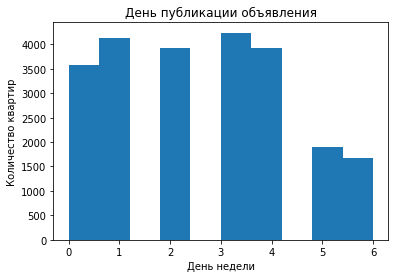

In [56]:
plt.hist(data['day_of_week_exposition_number'])
plt.title('День публикации объявления')
plt.xlabel('День недели')
plt.ylabel('Количество квартир')
plt.show()

Больше всего размещали объявлние в четверг, меньше в воскресенье. 

In [57]:
#Для того чтобы построить гистограмму по месяцам, в исходный датафрейм добавим столбец, в котором каждому месяцу будет 
#соответствовать цивровое значение. Например, январь=0, февраль=1 ...декабрь=11. 
def translate_in_number_month(row):
    month_exposition= row['month_exposition']
    
    if month_exposition == 'January':
        return 0
    
    if month_exposition == 'February':
        return 1
    
    if month_exposition == 'March':
        return 2
    
    if month_exposition == 'April':
        return 3
    
    if month_exposition == 'May':
        return 4
    
    if month_exposition == 'June':
        return 5
    
    if month_exposition == 'July':
        return 6
    
    if month_exposition == 'August':
        return 7
    
    if month_exposition == 'September':
        return 8
    
    if month_exposition == 'October':
        return 9
    
    if month_exposition == 'November':
        return 10
    
    if month_exposition == 'December':
        return 11

data['month_exposition_number'] = data.apply(translate_in_number_month, axis = 1)
data.head(10)#Проверим себя

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_meter,day_of_week_exposition,day_of_week_exposition_number,month_exposition,year_exposition,floor_status,city_center_distance_km,nearest_airport_distance_km,nearest_park_distance_km,nearest_pond_distance_km,floor_status_number,month_exposition_number
0,20,13.000,108.00,2019-03-07,3,2.70,16.0,51.00,8,False,False,False,NaN,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,120370.37,Thursday,3,March,2019,другой,16.028,18.863,0.482,0.755,0,2
1,7,3.350,40.40,2018-12-04,1,2.65,11.0,18.60,1,False,False,False,11.00,2.0,поселок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,82920.79,Tuesday,1,December,2018,первый,18.603,12.817,NaN,NaN,1,11
2,10,5.196,56.00,2015-08-20,2,2.65,5.0,34.30,4,False,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,NaN,92785.71,Thursday,3,August,2015,другой,13.933,21.741,0.090,0.574,0,7
3,0,64.900,NaN,2015-07-24,3,2.65,14.0,NaN,9,False,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,NaN,Friday,4,July,2015,другой,6.800,28.098,0.084,0.234,0,6
4,2,10.000,100.00,2018-06-19,2,NaN,14.0,32.00,13,False,False,False,NaN,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,100000.00,Tuesday,1,June,2018,другой,8.098,31.856,0.112,0.048,0,5
5,10,2.890,30.40,2018-09-10,1,2.65,12.0,14.40,5,False,False,False,9.10,0.0,городской поселок Янино-1,NaN,NaN,0,NaN,0,NaN,55.0,95065.79,Monday,0,September,2018,другой,NaN,NaN,NaN,NaN,0,8
6,6,3.700,37.30,2017-11-02,1,2.65,26.0,10.60,6,False,False,False,14.40,1.0,поселок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0,99195.71,Thursday,3,November,2017,другой,19.143,52.996,NaN,NaN,0,10
7,5,7.915,71.60,2019-04-18,2,2.65,24.0,NaN,22,False,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN,110544.69,Thursday,3,April,2019,другой,11.634,23.982,NaN,NaN,0,3
8,20,2.900,33.16,2018-05-23,1,2.65,27.0,15.43,26,False,False,False,8.81,0.0,поселок Мурино,NaN,NaN,0,NaN,0,NaN,189.0,87454.76,Wednesday,2,May,2018,другой,NaN,NaN,NaN,NaN,0,4
9,18,5.400,61.00,2017-02-26,3,2.50,9.0,43.60,7,False,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0,88524.59,Sunday,6,February,2017,другой,15.008,50.898,NaN,NaN,0,1


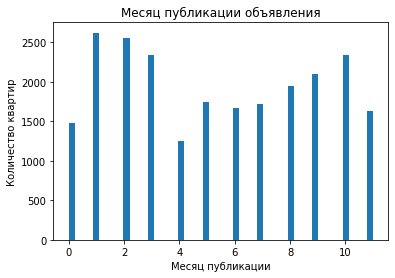

In [58]:
plt.hist(data['month_exposition_number'], bins=50, range=(0,11))
plt.title('Месяц публикации объявления')
plt.xlabel('Месяц публикации')
plt.ylabel('Количество квартир')
plt.show()

Больше всего публикаций было в феврале, меньше всего в мае. 

#### Изучение времени продажи квартиры

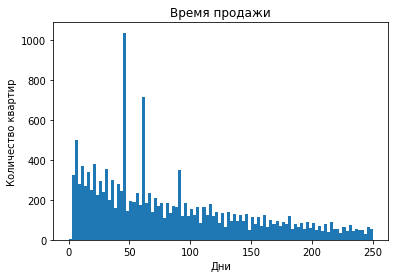

count    18562.000000
mean       129.034264
std        121.640084
min          1.000000
25%         42.000000
50%         85.000000
75%        183.000000
max        512.000000
Name: days_exposition, dtype: float64

In [59]:
# Гистограма времени продажи
plt.hist(data['days_exposition'], bins=100, range=(0,250))
plt.title('Время продажи')
plt.xlabel('Дни')
plt.ylabel('Количество квартир')
plt.show()
# Изучаем значения срока продажи
data.query('days_exposition != 9999')['days_exposition'].describe()

<b>Вывод:</b> Медианное время продажи - 85 дней, среднее - 183 день. В основной массе объекты продаются в срок до 100 дней. Есть большое количество объектов, которые продались за несколько дней. Также есть объекты, которые продавались и больше 200 дней. Быстрой продажей можно назвать срок 42 дней и меньше, долгой же - 232 дня и больше. 

#### Изучение влияния факторов на общую (полную) стоимость объекта?

##### Зависимость от общей площади

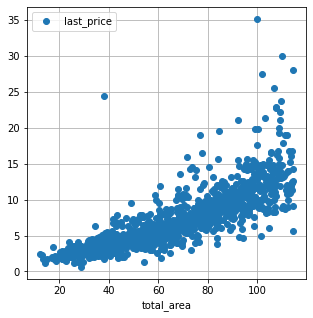

Корреляция цены и площади: 

            last_price  total_area
last_price     1.00000     0.47191
total_area     0.47191     1.00000 



In [60]:
(
    data.pivot_table(index='total_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и площади:','\n')
print(data.pivot_table(index='floor', values=['total_area', 'last_price']).corr(),'\n')

Выраженная зависимость цены от общей площади: чем больше площадь, тем выше цена. 

##### Зависимость от жилой площади

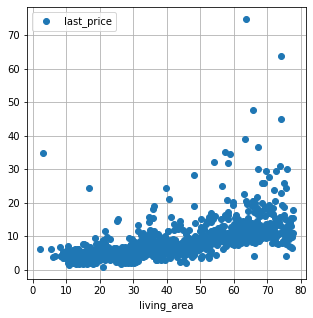

Корреляция цены и площади: 

             last_price  living_area
last_price     1.000000     0.437062
living_area    0.437062     1.000000 



In [61]:
(
    data.pivot_table(index='living_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и площади:','\n')
print(data.pivot_table(index='floor', values=['living_area', 'last_price']).corr(),'\n')

Выраженная зависимость цены от жилой площади: чем больше площадь, тем выше цена. 

##### Зависимость от площади кухни

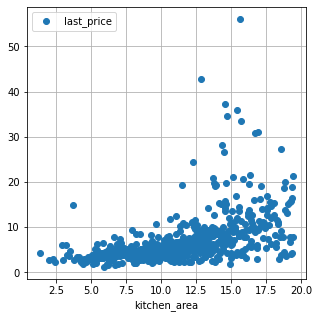

Корреляция цены и площади: 

              kitchen_area  last_price
kitchen_area      1.000000    0.109654
last_price        0.109654    1.000000 



In [62]:
(
    data.pivot_table(index='kitchen_area', values='last_price')
    .plot(grid=True, style='o', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и площади:','\n')
print(data.pivot_table(index='floor', values=['kitchen_area', 'last_price']).corr(),'\n')

Зависимость цены от площади кухни слабая. Утверждать о том, что с увелечением площади кухни увеличчивается цена - нельзя.  

##### Зависимость от количества комнат

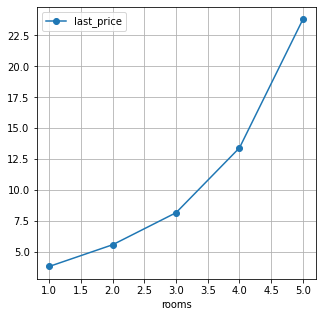

Корреляция цены и числа комнат: 

            last_price     rooms
last_price    1.000000  0.613961
rooms         0.613961  1.000000 



In [63]:
(
    data.query('rooms > 0').pivot_table(index='rooms', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
print('Корреляция цены и числа комнат:','\n')
print(data.query('rooms > 0').pivot_table(index='floor', values=['rooms', 'last_price']).corr(),'\n')

Зависимость есть: с увеличением числа комнат увеличивается и цена. 

##### Зависимость от этажа, на котором находится квартира

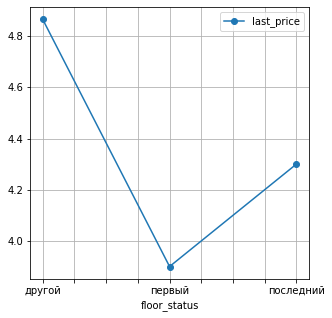

In [64]:
(
    data.pivot_table(index='floor_status', values='last_price', aggfunc='median')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

Цена квартиры падает, если объект находится на первом этаже. Ситуация с последним этажом чуть лучше, но все равно цена ниже, чем у квартир на других этажах. 

##### Зависимость от даты размещения

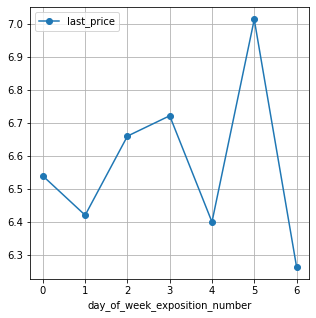

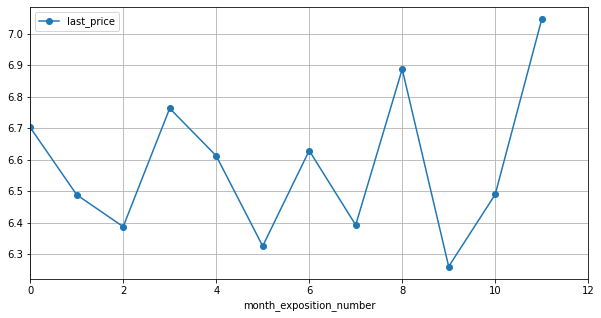

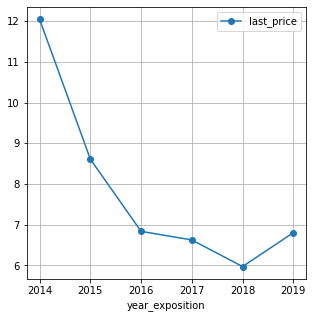

In [65]:
# Зависимость от дня размещения
(
    data.pivot_table(index='day_of_week_exposition_number', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()
# Зависимость от месяца размещения
(
    data.pivot_table(index='month_exposition_number', values='last_price')
    .plot(grid=True, style='o-', xlim=(0,12), figsize=(10, 5))
)
plt.show()
# Зависимость от года размещения
(
    data.pivot_table(index='year_exposition', values='last_price')
    .plot(grid=True, style='o-', figsize=(5, 5))
)
plt.show()

<b>Зависимость от дня:</b> наибольшая цена у объектов, выставленных на продажу в субботу, наименьшая - воскресенье
<b>Зависимость от месяца:</b> Наибольшая цена у квартир, выставленных на продажу в декабре, наименьшая - октябрь. 
<b>Зависимость от года:</b> Квартиры сильно подешевели в период с 2017 по 2018, после наметился небольшой рост. Однако пик цен был в 2014 году. 

#### Посчитать среднюю цену одного квадратного метра в 10 населённых пунктах

In [66]:
# Сравниваем среднюю стоимость квадратного метра в топ-10 городов по числу объявлений
city_ten = data['locality_name'].value_counts().head(10)
city_sm_price = data.query('locality_name in (@city_ten.index)').pivot_table(values='price_per_meter', index='locality_name')
city_sm_price = city_sm_price.astype(int)
city_sm_price.sort_values('price_per_meter', ascending=False)

,price_per_meter
locality_name,
Санкт-Петербург,110661
Пушкин,101960
деревня Кудрово,92229
поселок Парголово,90448
поселок Мурино,85029
поселок Шушары,78303
Колпино,75370
Гатчина,68919
Всеволожск,68637


<b>Вывод:</b> Наибольшая стоимость квадратного метра, как и ожидалось, в Санкт-Петербурге. Наименьшая - Выборг, что объясняется его небольшой численностью населения и большой удаленностью от Санкт-Петербурга. Учитвая, что также нельшая цена за кв.м. наблюдается в городах Гатчина и Всеволожск (тоже далеко находятся от Питера) можно сделать вывод о том, что цена за кв.м. уменьшается с увеличение отдаленности от Санкт-Петербурга. Проверим это в следующем пункте.

#### Вычислить среднюю цену каждого километра

<AxesSubplot:xlabel='city_center_distance_km'>

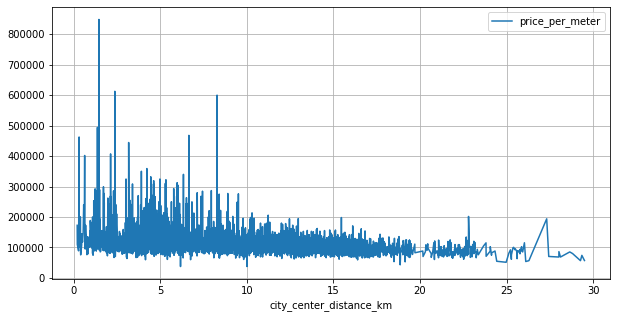

In [68]:
depend_price_km = data.query('locality_name == "Санкт-Петербург"').pivot_table(index='city_center_distance_km', values='price_per_meter', aggfunc='mean')
depend_price_km.head(10)
depend_price_km.plot(figsize=(10, 5), grid=True)

Чем дальше объект находится от центра, тем дешевле его кв.м.

### Общий вывод

<b>Цель:</b>найти интересные особенности и зависимости, которые существуют на рынке недвижимости.
<b>Что было сделано:</b><br>
1)Прочитали файл и сохранили его в data. Предварительно ознакомились с данными.<br>
2)Произвели предобработку данных:
<ul>
<li>Заполнили пропуски в данных;</li>  
<li>Изменили типы данных;</li>
<li>Изабивились от неявных дубликатов;</li>
<li>Изабивились от выбивающихся значений;</li>
<li>Добавлены столбцы, необходимые для дальнейшего анализа.</li>
</ul>
3)Изучили и описали параметры, построили для каждого параметра гистограмму и рассчитали корреляцию. <br>
4)Изучили то, как быстро продавались квартиры. <br>
5)Изучили параметры и определили их влияние на стоимость квартир. <br>
6)Посчитали среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений.<br>
7)Вычислили среднюю цену каждого километра.<br>

<b>Общий вывод:</b>
В основной массе объекты продаются в срок до 100 дней (медиана 85 дней, среднее 183). Есть большое количество объектов, которые продались за несколько дней. Также есть объекты, которые продавались и больше 200 дней. Быстрой продажей можно назвать срок 42 дней и меньше, долгой же - 232 дня и больше. 

В большей степени (коэфф. корр. 0,6139) цена за квартиру зависит от количество комнат: чем больше комнат, тем выше цена. В меньшей степени цена на квартиру зависит от общей площади (коэфф. корр. 0,4719). 

Чем ближе населенный пункт находится к Санкт-Петербургу, тем выше цена за объект. 
Юлиже к центру к